In [1]:
# Just to know last time this was run:
import time
print time.ctime()

Wed Jun  1 17:03:05 2016


# E Introduction to Scipy

This is part of the Python lecture given by Christophe Morisset at IA-UNAM. More informations at: http://python-astro.blogspot.mx/

Scipy is a library with a lot of foncionalities, we will not cover everything here, but rather point to some of them with examples.
Some useful links about scipy:

* https://scipy-lectures.github.io/intro/scipy.html
* http://docs.scipy.org/doc/scipy/reference/tutorial/

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/Users/christophemorisset/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import scipy # This imports a lot of numpy stuff, but not the important modules

### Some usefull methods

In [4]:
from scipy.stats import nanmean

In [5]:
a = np.array([-2, -1, 1., 2, 3])
b = np.log10(a)
mask = np.isfinite(b)
print a
print b
print mask
print a.mean()
print b.mean()
print b[mask].mean()
print nanmean(b)

[-2. -1.  1.  2.  3.]
[        nan         nan  0.          0.30103     0.47712125]
[False False  True  True  True]
0.6
nan
0.259383750128
0.259383750128


/Users/christophemorisset/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


In [6]:
from scipy.special import gamma
print gamma(10.3)

716430.689062


In [7]:
from scipy import constants as cst
print cst.astronomical_unit # A lot of constants
from scipy.constants import codata # a lot more, with units. From NIST
print codata.value('proton mass'), codata.unit('proton mass')

1.49597870691e+11
1.672621898e-27 kg


### Integrations

In [8]:
from scipy.integrate import trapz, cumtrapz, simps
#help(scipy.integrate) # a big one...
print '----------------------------------------------------------------------------------'
help(trapz)
print '----------------------------------------------------------------------------------'
help(cumtrapz)
print '----------------------------------------------------------------------------------'
help(simps)

----------------------------------------------------------------------------------
Help on function trapz in module numpy.lib.function_base:

trapz(y, x=None, dx=1.0, axis=-1)
    Integrate along the given axis using the composite trapezoidal rule.
    
    Integrate `y` (`x`) along given axis.
    
    Parameters
    ----------
    y : array_like
        Input array to integrate.
    x : array_like, optional
        The sample points corresponding to the `y` values. If `x` is None,
        the sample points are assumed to be evenly spaced `dx` apart. The
        default is None.
    dx : scalar, optional
        The spacing between sample points when `x` is None. The default is 1.
    axis : int, optional
        The axis along which to integrate.
    
    Returns
    -------
    trapz : float
        Definite integral as approximated by trapezoidal rule.
    
    See Also
    --------
    sum, cumsum
    
    Notes
    -----
    Image [2]_ illustrates trapezoidal rule -- y-axis locat

In [9]:
dir(scipy.integrate)

['IntegrationWarning',
 'Tester',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '_dop',
 '_ode',
 '_odepack',
 '_quadpack',
 'absolute_import',
 'complex_ode',
 'cumtrapz',
 'dblquad',
 'division',
 'fixed_quad',
 'lsoda',
 'newton_cotes',
 'nquad',
 'ode',
 'odeint',
 'odepack',
 'print_function',
 'quad',
 'quad_explain',
 'quadpack',
 'quadrature',
 'romb',
 'romberg',
 's',
 'simps',
 'test',
 'tplquad',
 'trapz',
 'vode']

In [10]:
# Defining x and y
x = np.linspace(0, 10, 100)
y = np.sin(x)
# Compare the integrales using two methods
print trapz(y, x)
print simps(y, x)

1.83750758633
1.83909194697


In [11]:
# Cumulative integrale
print cumtrapz(np.abs(y), x)

[  5.09284951e-03   2.03194796e-02   4.55246645e-02   8.04514533e-02
   1.24743789e-01   1.77950140e-01   2.39528101e-01   3.08849923e-01
   3.85208914e-01   4.67826642e-01   5.55860873e-01   6.48414152e-01
   7.44542958e-01   8.43267317e-01   9.43580798e-01   1.04446077e+00
   1.14487882e+00   1.24381125e+00   1.34024951e+00   1.43321048e+00
   1.52174647e+00   1.60495491e+00   1.68198755e+00   1.75205909e+00
   1.81445519e+00   1.86853977e+00   1.91376146e+00   1.94965927e+00
   1.97586722e+00   1.99211816e+00   1.99824642e+00   2.00334164e+00
   2.01754235e+00   2.04174210e+00   2.07569419e+00   2.11905248e+00
   2.17137499e+00   2.23212830e+00   2.30069308e+00   2.37637035e+00
   2.45838864e+00   2.54591181e+00   2.63804762e+00   2.73385681e+00
   2.83236266e+00   2.93256097e+00   3.03343028e+00   3.13394229e+00
   3.23307235e+00   3.32980988e+00   3.42316870e+00   3.51219709e+00
   3.59598746e+00   3.67368561e+00   3.74449946e+00   3.80770711e+00
   3.86266420e+00   3.90881048e+00

100 99


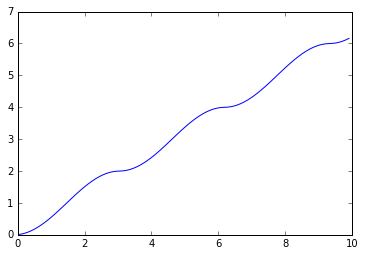

In [12]:
# Cumulative integral
print len(x), len(cumtrapz(np.abs(y), x))
f, ax = plt.subplots()
ax.plot(x[0:-1], cumtrapz(np.abs(y), x));

In [13]:
from scipy.integrate import quad # To compute a definite integral
from scipy.special import jv # Bessel function
#help(quad)
print quad(lambda x: jv(2.5, x), 0, 10) # Integrate the Bessel function of order 2.5 between 0 and 10

(0.8209075326034347, 1.1793289815399173e-08)


We now want to evaluate:
$$ \int_0^1 1 + 2 x + 3 x^2 dx $$

In [15]:
# We want here integrate a user-defined function (here polynome) between 0 and 1
def f(x, a, b, c):
    """ Returning a 2nd order polynome """
    return a + b * x + c * x**2
%timeit I = quad(f, 0, 1, args=(1,2,3)) # args will send 1, 2, 3 to f
I = quad(f, 0, 1, args=(1,2,3)) # args will send 1, 2, 3 to f
print I
Integ = I[0]
print Integ

100000 loops, best of 3: 11.5 µs per loop
(3.0, 3.3306690738754696e-14)
3.0


### Interpolations

In [16]:
from scipy.interpolate import interp1d, interp2d, splrep, splev, griddata

In [17]:
#help(scipy.interpolate) # a huge one...
help(interp1d)

Help on class interp1d in module scipy.interpolate.interpolate:

class interp1d(scipy.interpolate.polyint._Interpolator1D)
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``.  This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string
 |      ('linear', 'nearest', 'zero', 'slinear', 'quadratic, 'cubic'
 |      where 'slinear', 'quadratic' and 'cubic' refer to a spline
 |      interpolation of first, second or third order) or as an integer
 |      specifying the order of the spline interpolator to use.
 |      Default is 'linear'.
 

In [18]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
f = interp1d(x, y) # this creates a function that can be call at any interpolate point
f2 = interp1d(x, y, kind='cubic') # The same but using cubic interpolation
tck = splrep(x, y, s=0) # This initiate the spline interpolating function, finding the B-spline representation of 1-D curve.
# tck is a sequence of length 3 returned by `splrep` or `splprep` containing the knots, coefficients, and degree of the spline.
f3 = lambda x: splev(x, tck) # Evaluate the B-spline or its derivatives.

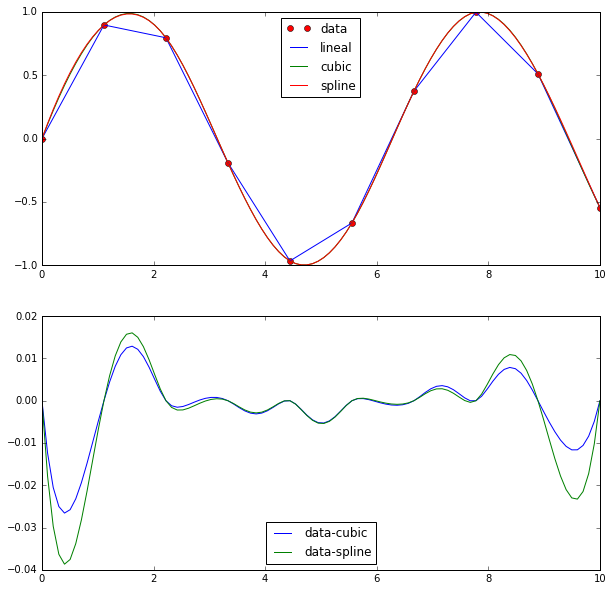

In [19]:
# Defining the high resolution mesh
xfine = np.linspace(0, 10, 100)
yfine = np.sin(xfine)
# Plot to compare the results
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

ax1.plot(x, y, 'or', label='data')
ax1.plot(xfine, f(xfine), label='lineal')
ax1.plot(xfine, f2(xfine), label='cubic')
ax1.plot(xfine, f3(xfine), label='spline') 
ax1.legend(loc=9)

ax2.plot(xfine, (yfine-f2(xfine)), label='data-cubic')
ax2.plot(xfine, (yfine-f3(xfine)), label='data-spline')
ax2.legend(loc=8);

In [20]:
x0 = 3.5
print np.sin(x0), f(x0), f2(x0), f3(x0)

-0.35078322769 -0.306630335983 -0.349437256954 -0.349597252402


#### 2D interpolation

In [21]:
# Defining a 2D-function
def func(x, y):
    return x * (1+x) * np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [22]:
# Initializing a 2D coordinate grid. Note the use of j to specify that the end point is included.
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [23]:
print grid_x
print grid_y

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.01010101  0.01010101  0.01010101 ...,  0.01010101  0.01010101
   0.01010101]
 [ 0.02020202  0.02020202  0.02020202 ...,  0.02020202  0.02020202
   0.02020202]
 ..., 
 [ 0.97979798  0.97979798  0.97979798 ...,  0.97979798  0.97979798
   0.97979798]
 [ 0.98989899  0.98989899  0.98989899 ...,  0.98989899  0.98989899
   0.98989899]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]
[[ 0.          0.00502513  0.01005025 ...,  0.98994975  0.99497487  1.        ]
 [ 0.          0.00502513  0.01005025 ...,  0.98994975  0.99497487  1.        ]
 [ 0.          0.00502513  0.01005025 ...,  0.98994975  0.99497487  1.        ]
 ..., 
 [ 0.          0.00502513  0.01005025 ...,  0.98994975  0.99497487  1.        ]
 [ 0.          0.00502513  0.01005025 ...,  0.98994975  0.99497487  1.        ]
 [ 0.          0.00502513  0.01005025 ...,  0.98994975  0.99497487  1.        ]]


In [24]:
# Generating 1000 x 2 points randomly
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

In [25]:
# griddata is the 2D-interpolating method. We want to obtain values on (grid_x, grid_y) points, 
# using "points" and "values".
%timeit grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
%timeit grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
%timeit grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

100 loops, best of 3: 14.3 ms per loop
100 loops, best of 3: 9.96 ms per loop
100 loops, best of 3: 16.4 ms per loop


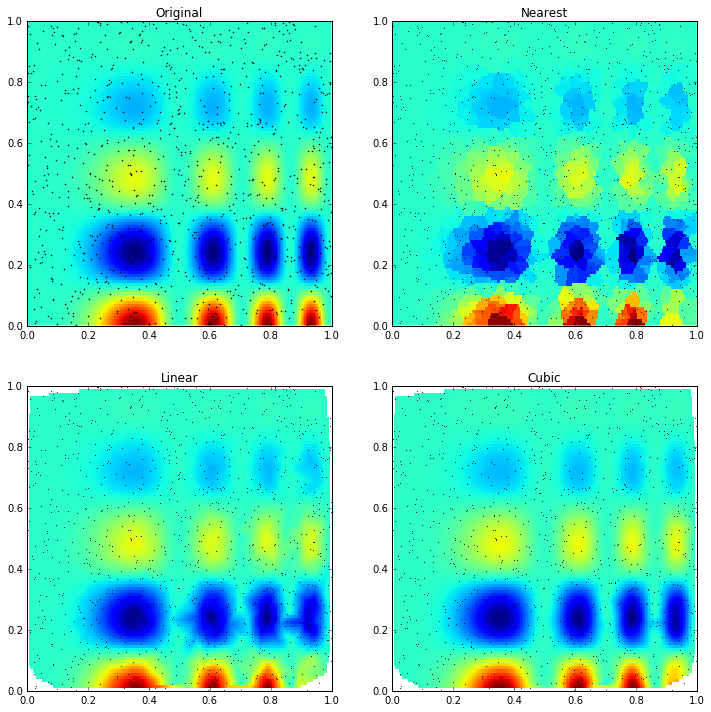

In [27]:
# 4 subplots
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

ax1.imshow(func(grid_x, grid_y), extent=(0,1,0,1), interpolation='none',
           origin='upper')
ax1.plot(points[:,0], points[:,1], 'ko', ms=1)
ax1.set_title('Original')

ax2.imshow(grid_z0, extent=(0,1,0,1), interpolation='none',
           origin='upper')
ax2.plot(points[:,0], points[:,1], 'k.', ms=1)
ax2.set_title('Nearest')

ax3.imshow(grid_z1, extent=(0,1,0,1), interpolation='none',
           origin='upper')
ax3.plot(points[:,0], points[:,1], 'k.', ms=1)
ax3.set_title('Linear')

ax4.imshow(grid_z2, extent=(0,1,0,1), interpolation='none',
           origin='upper')
ax4.plot(points[:,0], points[:,1], 'k.', ms=1)
ax4.set_title('Cubic');

### Linear algebra

Scipy is able to deal with matrices, solving linear equations, solving linear least-squares problems and pseudo-inverses, finding eigenvalues and eigenvectors, and more, see here: 
http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html

### Data fit

In [28]:
from scipy.optimize import curve_fit # this is used to adjust a set of data

In [29]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array
        for functions with k predictors.
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be dete

In [30]:
def gauss(x, A, B, C, S):
    # This is a gaussian function.
    return A + B*np.exp(-1 * (x - C)**2 / (2 * S**2))

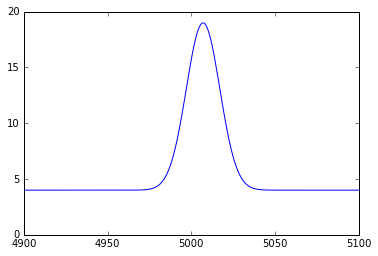

In [31]:
# We define the parameters used to generate the signal (gaussian at lambda=5007)
N_lam = 200
A = 4.
B = 15.
Lam0 = 5007.
Sigma = 10.
# We define a wavelength range
lam = np.linspace(4900, 5100, N_lam)
# Computing the signal
fl = gauss(lam, A, B, Lam0, Sigma)
f, ax =plt.subplots()
ax.plot(lam, fl)
ax.set_ylim(0,20);

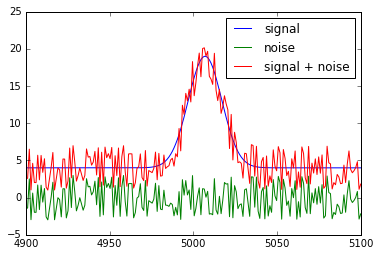

In [32]:
SN = 5. # Signal/Noise
noise = B / SN * (np.random.rand(N_lam)*2 - 1)
fl2 = fl + noise
f, ax =plt.subplots()
ax.plot(lam, fl, label='signal')
ax.plot(lam, noise, label='noise')
ax.plot(lam, fl2, label='signal + noise')
ax.legend(loc='best');

In [33]:
# Initial guess:
A_i = 0.
B_i = 1.
Lam0_i = 5000.
Sigma_i = 1.
fl_init = gauss(lam, A_i, B_i, Lam0_i, Sigma_i)
error = np.ones_like(lam) * np.mean(np.abs(noise)) # We define the error (the same on each pixel of the spectrum)

In [34]:
# fitting the noisy data with the gaussian function, using the initial guess and the errors
fit, covar = curve_fit(gauss, lam, fl2, [A_i, B_i, Lam0_i, Sigma_i], error)
print('   A     B    Lam0     S')
print('{0:.2f} {1:5.2f} {2:.2f} {3:5.2f}'.format(A, B, Lam0, Sigma))
print('{0:.2f} {1:5.2f} {2:.2f} {3:5.2f}'.format(A_i, B_i, Lam0_i, Sigma_i))
print('{0[0]:.2f} {0[1]:5.2f} {0[2]:5.2f} {0[3]:.2f}'.format(fit))

   A     B    Lam0     S
4.00 15.00 5007.00 10.00
0.00  1.00 5000.00  1.00
3.82 14.95 5006.96 9.96


In [35]:
# Computing the fit on the lambdas
fl_fit = gauss(lam, fit[0], fit[1], fit[2], fit[3])

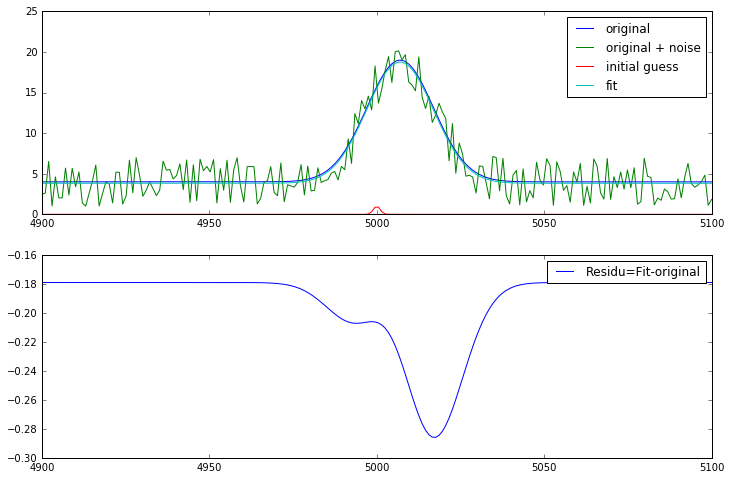

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(lam, fl, label='original')
ax1.plot(lam, fl2, label='original + noise')
ax1.plot(lam, fl_init, label='initial guess')
ax1.plot(lam, fl_fit, label='fit')
ax1.legend()

ax2.plot(lam, fl_fit - fl, label='Residu=Fit-original')
ax2.legend();

In [37]:
# Integrating using the Simpson method the gaussian (without the continuum)
print simps(fl - A, lam)
print simps(fl2 - fit[0], lam)
print simps(fl_fit - fit[0], lam)

375.994241195
374.861103061
373.225105596


In [38]:
khi_sq = (((fl2-fl_fit) / error)**2).sum() # The problem here is to determine the error...
khi_sq_red = khi_sq / (len(lam) - 4 - 1) # reduced khi_sq = khi_sq / (N - free_params - 1)
print khi_sq, khi_sq_red

252.019224164 1.29240627777


### Multivariate estimation

In [39]:
from scipy import stats

In [40]:
def measure(n):
    """Measurement model, return two coupled measurements."""
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [41]:
# Define the 
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()
print xmin, xmax, ymin, ymax

-4.22246586473 4.11472562257 -4.00698468532 3.22607780801


In [42]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel.evaluate(positions).T, X.shape)

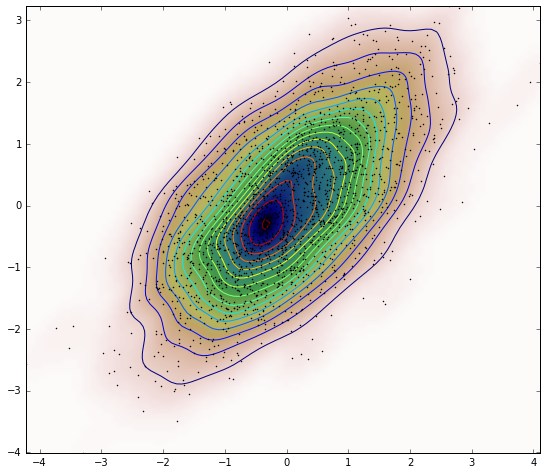

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax], origin='upper')
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
levels = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15]
cs = ax.contour(X, Y, Z, levels=levels); # I dont't know what those levels mean... but it works fine!

In [45]:
# We save the contour paths in a list
paths = []
for collec in cs.collections:
    try:
        paths.append(collec.get_paths()[0])
    except:
        pass

In [46]:
# Looking for the number of points inside each contour
print len(m1)
for level, path in zip(levels, paths):
    print('level {0:4.2f} contains {1:2.0f}% of the data'.format(level, 
                                                               path.contains_points(zip(m1, m2)).sum() / float(len(m1))*100))

2000
level 0.01 contains 96% of the data
level 0.02 contains 90% of the data
level 0.03 contains 83% of the data
level 0.04 contains 76% of the data
level 0.05 contains 70% of the data
level 0.06 contains 63% of the data
level 0.07 contains 56% of the data
level 0.08 contains 50% of the data
level 0.09 contains 42% of the data
level 0.10 contains 36% of the data
level 0.11 contains 29% of the data
level 0.12 contains 19% of the data
level 0.13 contains 10% of the data
level 0.14 contains  5% of the data
level 0.15 contains  0% of the data


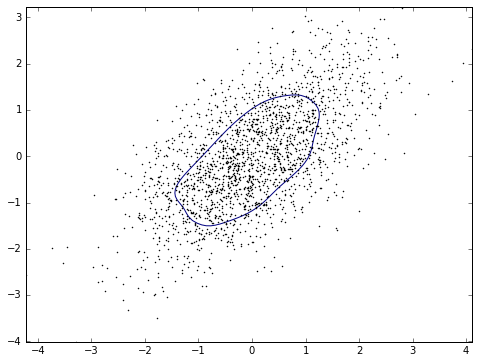

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
cs = ax.contour(X, Y, Z, levels=[0.078]); #  seems to correspond to 50% of the points inside

### Convolution

More information there: http://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html

In [48]:
# Let's define an image representing a long slit of width 10 pixels
slit = np.zeros((100, 100))
slit[30:40, :] = 1

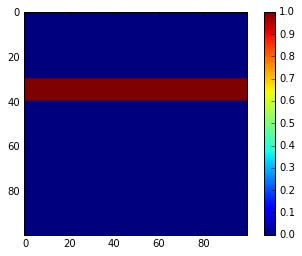

In [49]:
plt.imshow(slit)
plt.colorbar();

In [50]:
# This is the routine to apply a gaussian convolution
from scipy.ndimage.filters import gaussian_filter

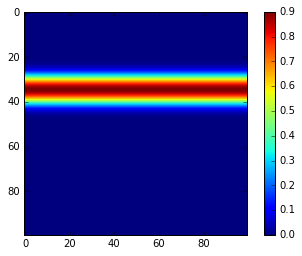

In [51]:
slit_seeing = gaussian_filter(slit, 3) # Convolve with a gaussian, 3 is the standard deviation in pixels
plt.imshow(slit_seeing)
plt.colorbar();

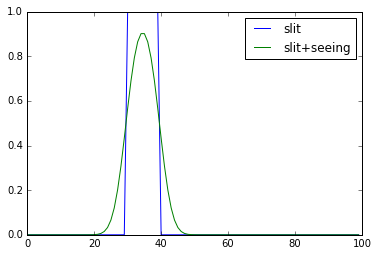

In [52]:
f, ax =plt.subplots()
ax.plot(slit[:,50], label='slit') # original slit
ax.plot(slit_seeing[:,50], label='slit+seeing') # slit with seeing
ax.legend(loc='best');

In [53]:
# Check that the slit transmission is conserved:
print simps(slit[:,50]), simps(slit_seeing[:,50])

10.0 10.0


### Quantiles

In [54]:
from scipy.stats.mstats import mquantiles

In [55]:
#help(mquantiles)

In [56]:
data = np.random.randn(1000)

In [57]:
mquantiles(data, [0.16, 0.84]) # should return something close to -1, 1 (the stv of the normal distribution)

array([-1.0245078 ,  1.04750432])

In [58]:
data = np.array([[   6.,    7.,    1.],
                         [  47.,   15.,    2.],
                         [  49.,   36.,    3.],
                         [  15.,   39.,    4.],
                         [  42.,   40., -999.],
                         [  41.,   41., -999.],
                         [   7., -999., -999.],
                         [  39., -999., -999.],
                         [  43., -999., -999.],
                         [  40., -999., -999.],
                         [  36., -999., -999.]])

In [59]:
mq = mquantiles(data, axis=0, limit=(0, 50))
print mq
print type(mq)
mq?
print mq.mask

[[ 19.2   14.6    1.45]
 [ 40.    37.5    2.5 ]
 [ 42.8   40.05   3.55]]
<class 'numpy.ma.core.MaskedArray'>
False


### Input/Output

Scipy has many modules, classes, and functions available to read data from and write data to a variety of file formats.

Including MATLAB and IDL files. See http://docs.scipy.org/doc/scipy/reference/io.html